[ 8  2  9 10  7  6  4  5  3  1]
7     21
5     10
8     10
6      7
9      7
3      5
1      3
4      3
10     3
2      2
Name: mens_cramp, dtype: int64


D:\Programs\anaconda3\envs\robinconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programs\anaconda3\envs\robinconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programs\anaconda3\envs\robinconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programs\anaconda3\envs\robinconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programs\anaconda3\envs\robinconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programs\anaconda3\envs\robinconda\lib\site-packages\matp

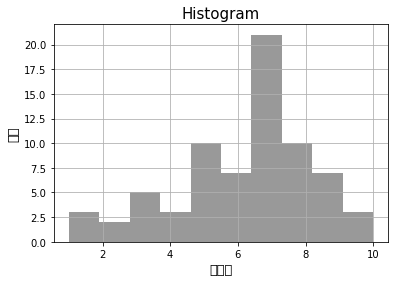

*빈도 array : [ 3.  2.  5.  3. 10.  7. 21. 10.  7.  3.]
*구간 array : [ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1 10. ]


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/test1.csv")

print(df['mens_cramp'].unique())
print(df['mens_cramp'].value_counts())

plt.title("Histogram", fontsize=15)
frq, bins, fig = plt.hist(df["mens_cramp"], bins=10, alpha=.8, color='grey')
plt.ylabel("빈도", fontsize=13)
plt.xlabel("월경통", fontsize=13)
plt.grid()
plt.show()
print("*빈도 array :", frq)
print("*구간 array :", bins)

Accuracy is:  0.5454545454545454
[[3 0 2]
 [3 6 3]
 [1 1 3]]
              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.86      0.50      0.63        12
           2       0.38      0.60      0.46         5

    accuracy                           0.55        22
   macro avg       0.55      0.57      0.53        22
weighted avg       0.65      0.55      0.56        22

Feature: 0, Score: 0.02131
Feature: 1, Score: 0.03240
Feature: 2, Score: 0.02141
Feature: 3, Score: 0.01813
Feature: 4, Score: 0.02493
Feature: 5, Score: 0.02933
Feature: 6, Score: 0.00495
Feature: 7, Score: 0.00320
Feature: 8, Score: 0.00790
Feature: 9, Score: 0.00603
Feature: 10, Score: 0.00249
Feature: 11, Score: 0.04004
Feature: 12, Score: 0.00413
Feature: 13, Score: 0.00753
Feature: 14, Score: 0.00131
Feature: 15, Score: 0.00452
Feature: 16, Score: 0.00524
Feature: 17, Score: 0.00871
Feature: 18, Score: 0.00509
Feature: 19, Score: 0.00340
Feature:

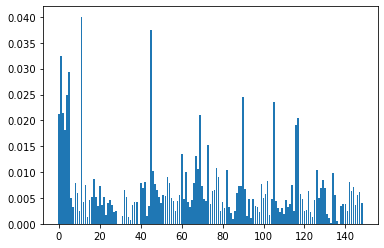

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # train/test
from sklearn.datasets import load_wine # dataset 
from sklearn.metrics import accuracy_score, confusion_matrix # 평가 : 분류정확도 
from sklearn.metrics import classification_report # 평가 : 정확률, 재현율, f1_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("data/test1.csv")
def rating(mens_cramp):
    if mens_cramp >= 8: return 2
    elif mens_cramp >= 6: return 1
    else: return 0
df['mens_cramp_rank'] = df.apply(lambda x: rating(x['mens_cramp']),axis=1)

x = df[['height', 'weight', 'mens_cycle', 'mens_period', 'menarche_age', 'bmi', 'diet_with_product', 'diet_no', 'diet_meal+exercise', 'diet_meal', 'diet_exercise', 'age', 'options_tension', 'options_stiffness', 'options_diarrhea', 'options_insomnia', 'options_abdominal_obesity', 'options_swelling', 'options_cold', 'exercise_type_walking', 'exercise_type_running', 'exercise_type_hiking', 'exercise_type_bicycle', 'exercise_type_golf', 'exercise_type_yoga_pilates', 'exercise_type_swimming', 'exercise_type_dance', 'exercise_type_fitness', 'thyroid_no', 'thyroid_hypothyroidism', 'thyroid_hyperthyroidism', 'thyroid_cancer', 'mens_disease_no', 'mens_disease_pms', 'mens_disease_fibroids', 'mens_disease_uterine_adenoma', 'mens_cramp_peak_before', 'mens_cramp_peak_first_day', 'mens_cramp_peak_second_day', 'mens_cramp_peak_third_day', 'mens_stress_peak_before', 'mens_stress_peak_first_day', 'mens_stressp_peak_second_day', 'mens_stress_peak_third_day', 'mens_cramp_part_belly', 'mens_cramp_part_pelvis', 'mens_cramp_part_waist', 'mens_cramp_part_below_thigh', 'mens_cramp_symptoms_swelling', 'mens_cramp_symptoms_emotion', 'mens_cramp_symptoms_belly_pain', 'mens_cramp_symptoms_constipation', 'mens_cramp_symptoms_lethargy', 'mens_cramp_symptoms_nervousness', 'mens_cramp_symptoms_indigestion', 'mens_cramp_symptoms_gas', 'mens_cramp_symptoms_diarrhea', 'mens_cramp_symptoms_digestive_upset', 'mens_cramp_symptoms_back_pain', 'mens_cramp_symptoms_chest_pain', 'mens_cramp_symptoms_increased_appetite', 'mens_cramp_symptoms_headache', 'mens_cramp_symptoms_depression', 'mens_cramp_symptoms_reduced_temperance', 'mens_cramp_symptoms_migraine', 'mens_cramp_symptoms_drowsiness', 'mens_cramp_symptoms_sensitive_temperature', 'mens_cramp_symptoms_colic', 'mens_cramp_symptoms_leg_numbness', 'mens_cramp_symptoms_leg_swelling', 'mens_cramp_symptoms_voracity', 'mens_cramp_symptoms_insomnia', 'mens_cramp_symptoms_anxiety', 'mens_cramp_symptoms_nausea', 'mens_cramp_symptoms_decreased_appetite', 'mens_cramp_symptoms_excessive_sleep', 'mens_cramp_symptoms_pimple', 'mens_cramp_symptoms_sickness', 'mens_cramp_symptoms_exhaustion', 'mens_cramp_symptoms_breathing_problem', 'mens_cramp_symptoms_dull_movement', 'mens_cramp_symptoms_gastrointestinal_disorder', 'mens_cramp_symptoms_muscle_pain', 'mens_cramp_symptoms_increased_libido', 'mens_cramp_symptoms_cold_sweat', 'mens_cramp_symptoms_dizziness', 'mens_cramp_symptoms_throw_up', 'mens_cramp_symptoms_abdominal_swelling', 'mens_cramp_symptoms_anemia', 'mens_cramp_symptoms_whirl', 'mens_cramp_symptoms_joint_pain', 'mens_cramp_symptoms_sweet', 'mens_cramp_symptoms_fever', 'mens_cramp_symptoms_chill', 'mens_cramp_symptoms_orthostatic_hypotension', 'mens_cramps_family_mother', 'mens_cramps_family_older_sister', 'mens_cramps_family_younger_sister', 'mens_cramps_family_relatives', 'mens_cramps_family_no', 'mens_symptoms_3_ovulation_cramps', 'mens_symptoms_3_long_cramps', 'mens_symptoms_3_abnormal', 'mens_symptoms_3_pressure', 'mens_symptoms_3_lump', 'mens_symptoms_3_abdominal_pain', 'mens_symptoms_3_gas', 'mens_symptoms_3_pelvis_pain', 'mens_symptoms_3_long_period', 'mens_symptoms_3_irregular_blood', 'mens_symptoms_3_waist_pain', 'mens_symptoms_3_stressful', 'mens_symptoms_3_cluster_blood', 'mens_symptoms_3_diarrhea', 'mens_symptoms_3_urination', 'mens_symptoms_3_irregular_blood_amount', 'mens_symptoms_3_intense_pain', 'mens_symptoms_3_stomachache', 'mens_before_after_pattern_toilet', 'mens_before_after_pattern_app', 'mens_before_after_pattern_embarrassment', 'mens_before_after_pattern_sex_nervousness', 'mens_before_after_pattern_sex_calculate_date', 'mens_before_after_pattern_sexual_desire', 'mens_before_after_pattern_accommodation', 'mens_before_after_pattern_keen', 'mens_before_after_pattern_cancellation', 'mens_before_after_pattern_work', 'mens_before_after_pattern_withstand', 'mens_before_after_pattern_urgent_cancellation', 'mens_before_after_pattern_sweet_spicy', 'mens_before_after_pattern_buy_comfy', 'mens_before_after_pattern_fancy', 'mens_before_after_pattern_partying', 'mens_before_after_pattern_comfy_clothes', 'mens_before_after_pattern_dark_clothes', 'mens_before_after_pattern_accessory', 'mens_before_after_pattern_heavy_makeup', 'mens_before_after_pattern_deceive', 'mens_before_after_pattern_help', 'mens_before_after_pattern_buy_pads', 'mens_before_after_pattern_borrow_pads', 'mens_before_after_pattern_bulk_purchase_pads', 'mens_before_after_pattern_excitement', 'mens_before_after_pattern_panty_blood', 'mens_before_after_pattern_throw_out_panty', 'mens_before_after_pattern_chest_lump', 'mens_before_after_pattern_weight_changes', 'mens_before_after_pattern_same_weight']]
y = df['mens_cramp_rank']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_pred, y_test))

con_mat = confusion_matrix(y_pred, y_test)
print(con_mat)

report = classification_report(y_pred, y_test)
print(report)

result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


# Final 서베이 예측

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("data/finalservey_1912_clean.csv")
def rating(mens_cramp):
    if mens_cramp >= 8: return 2
    elif mens_cramp >= 7: return 1
    else: return 0
df['mens_cramp_rank'] = df.apply(lambda x: rating(x['mens_cramp']),axis=1)

x = df[['height_1', 'weight_1', 'bmi', 'mens_period', 'mens_cycle', 'age', 'upper_body_size', 'lower_body_size', 'options_tension', 'options_stiffness', 'options_diarrhea', 'options_insomnia', 'options_abdominal_obesity', 'options_swelling', 'options_cold', 'exercise_type_walking', 'exercise_type_running', 'exercise_type_hiking', 'exercise_type_bicycle', 'exercise_type_golf', 'exercise_type_yoga_pilates', 'exercise_type_swimming', 'exercise_type_dance', 'exercise_type_fitness', 'thyroid_no', 'thyroid_hypothyroidism', 'thyroid_hyperthyroidism', 'thyroid_cancer', 'mens_disease_no', 'mens_disease_pms', 'mens_disease_fibroids', 'mens_disease_uterine_adenoma', 'menarche_age', 'mens_supplies_pad', 'mens_supplies_cotton_pad', 'mens_supplies_tampon', 'mens_supplies_cup', 'mens_cramp_peak_before', 'mens_cramp_peak_first_day', 'mens_cramp_peak_second_day', 'mens_cramp_peak_third_day', 'mens_stress', 'mens_stress_peak_before', 'mens_stress_peak_first_day', 'mens_stress_peak_second_day', 'mens_stress_peak_third_day', 'mens_cramp_part_belly', 'mens_cramp_part_pelvis', 'mens_cramp_part_waist', 'mens_cramp_part_below_thigh', 'mens_cramp_symptoms_swelling', 'mens_cramp_symptoms_emotion', 'mens_cramp_symptoms_belly_pain', 'mens_cramp_symptoms_constipation', 'mens_cramp_symptoms_lethargy', 'mens_cramp_symptoms_nervousness', 'mens_cramp_symptoms_indigestion', 'mens_cramp_symptoms_gas', 'mens_cramp_symptoms_diarrhea', 'mens_cramp_symptoms_digestive_upset', 'mens_cramp_symptoms_back_pain', 'mens_cramp_symptoms_chest_pain', 'mens_cramp_symptoms_increased_appetite', 'mens_cramp_symptoms_headache', 'mens_cramp_symptoms_depression', 'mens_cramp_symptoms_reduced_temperance', 'mens_cramp_symptoms_migraine', 'mens_cramp_symptoms_drowsiness', 'mens_cramp_symptoms_sensitive_temperature', 'mens_cramp_symptoms_colic', 'mens_cramp_symptoms_leg_numbness', 'mens_cramp_symptoms_leg_swelling', 'mens_cramp_symptoms_voracity', 'mens_cramp_symptoms_insomnia', 'mens_cramp_symptoms_anxiety', 'mens_cramp_symptoms_nausea', 'mens_cramp_symptoms_decreased_appetite', 'mens_cramp_symptoms_excessive_sleep', 'mens_cramp_symptoms_pimple', 'mens_cramp_symptoms_sickness', 'mens_cramp_symptoms_exhaustion', 'mens_cramp_symptoms_breathing_problem', 'mens_cramp_symptoms_dull_movement', 'mens_cramp_symptoms_gastrointestinal_disorder', 'mens_cramp_symptoms_muscle_pain', 'mens_cramp_symptoms_increased_libido', 'mens_cramp_symptoms_cold_sweat', 'mens_cramp_symptoms_dizziness', 'mens_cramp_symptoms_throw_up', 'mens_cramp_symptoms_abdominal_swelling', 'mens_cramp_symptoms_anemia', 'mens_cramp_symptoms_whirl', 'mens_cramp_symptoms_joint_pain', 'mens_cramp_symptoms_sweet', 'mens_cramp_symptoms_fever', 'mens_cramp_symptoms_chill', 'mens_cramp_symptoms_orthostatic_hypotension', 'mens_cramps_family_mother', 'mens_cramps_family_older_sister', 'mens_cramps_family_younger_sister', 'mens_cramps_family_relatives', 'mens_cramps_family_no', 'mens_symptoms_3_ovulation_cramps', 'mens_symptoms_3_long_cramps', 'mens_symptoms_3_abnormal', 'mens_symptoms_3_pressure', 'mens_symptoms_3_lump', 'mens_symptoms_3_abdominal_pain', 'mens_symptoms_3_gas', 'mens_symptoms_3_pelvis_pain', 'mens_symptoms_3_long_period', 'mens_symptoms_3_irregular_blood', 'mens_symptoms_3_waist_pain', 'mens_symptoms_3_stressful', 'mens_symptoms_3_cluster_blood', 'mens_symptoms_3_diarrhea', 'mens_symptoms_3_urination', 'mens_symptoms_3_irregular_blood_amount', 'mens_symptoms_3_intense_pain', 'mens_symptoms_3_stomachache', 'mens_before_after_pattern_toilet', 'mens_before_after_pattern_app', 'mens_before_after_pattern_embarrassment', 'mens_before_after_pattern_sex_nervousness', 'mens_before_after_pattern_sex_calculate_date', 'mens_before_after_pattern_sexual_desire', 'mens_before_after_pattern_accommodation', 'mens_before_after_pattern_keen', 'mens_before_after_pattern_cancellation', 'mens_before_after_pattern_work', 'mens_before_after_pattern_withstand', 'mens_before_after_pattern_urgent_cancellation', 'mens_before_after_pattern_sweet_spicy', 'mens_before_after_pattern_buy_comfy', 'mens_before_after_pattern_fancy', 'mens_before_after_pattern_partying', 'mens_before_after_pattern_comfy_clothes', 'mens_before_after_pattern_dark_clothes', 'mens_before_after_pattern_accessory', 'mens_before_after_pattern_heavy_makeup', 'mens_before_after_pattern_deceive', 'mens_before_after_pattern_help', 'mens_before_after_pattern_buy_pads', 'mens_before_after_pattern_borrow_pads', 'mens_before_after_pattern_bulk_purchase_pads', 'mens_before_after_pattern_excitement', 'mens_before_after_pattern_panty_blood', 'mens_before_after_pattern_throw_out_panty', 'mens_before_after_pattern_chest_lump', 'mens_before_after_pattern_weight_changes', 'mens_before_after_pattern_same_weight', 'mens_meal', 'mens_exercise', 'mens_cramps_level_before_meal_exercise', 'mens_cramps_level_after_meal_exercise', 'meal_exercise_effects', 'meal_exercise_effects_specific_reduced_cramps', 'meal_exercise_effects_specific_reduced_stress', 'meal_exercise_effects_specific_reduced_pain', 'meal_exercise_effects_specific_lose_weight', 'meal_exercise_effects_specific_gain_weight', 'meal_exercise_effects_specific_same_weight', 'meal_exercise_effects_specific_improved_inbody', 'meal_exercise_effects_specific_same_inbody', 'meal_exercise_effects_specific_no_pain', 'meal_exercise_effects_specific_no_pms', 'meal_exercise_effects_specific_no', 'weight_3_1', 'improvements_self_measurement', 'improvements_plan', 'improvements_results', 'improvements_hospital', 'improvements_1.1', 'meal_exercise_effects_c', 'pain_after']]
x = df['mens_cramp_rank']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_pred, y_test))

con_mat = confusion_matrix(y_pred, y_test)
print(con_mat)

report = classification_report(y_pred, y_test)
print(report)

result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


ValueError: Expected 2D array, got 1D array instead:
array=[2. 1. 0. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 0. 0. 2. 1. 2. 1. 2. 2. 2. 2. 0.
 1. 2. 2. 2. 2. 2. 2. 0. 0. 1. 2. 1. 1. 2. 2. 0. 0. 1. 0. 0. 1. 2. 1. 1.
 0. 0. 2. 2. 0. 2. 2. 2. 2. 2. 1. 2. 2. 2. 0. 0. 2. 1. 1. 1. 1. 1. 0. 0.
 2. 0. 2. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0. 1. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0.
 0. 1. 1. 2. 1. 2. 1. 2. 0. 1. 2. 1. 0. 1. 1. 0. 1. 2. 2. 1. 2. 1. 0. 1.
 2. 2. 2. 0. 2. 0. 2. 2. 1. 0. 0. 2. 2. 1. 1. 1. 0. 2. 2. 1. 2. 0. 2. 0.
 0. 2. 2. 0. 2. 2. 0. 2. 1. 1. 2. 2. 0. 1. 1. 2. 0. 2. 2. 0. 2. 2. 1. 2.
 0. 2. 2. 1. 1. 2. 2. 2. 0. 2. 2. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("data/finalservey_1912_clean.csv")
def rating(mens_cramp):
    if mens_cramp >= 8: return 2
    elif mens_cramp >= 7: return 1
    else: return 0
df['mens_cramp_rank'] = df.apply(lambda x: rating(x['mens_cramp']),axis=1)

x = df[['height_1', 'weight_1', 'bmi', 'mens_period', 'mens_cycle', 'age', 'upper_body_size', 'lower_body_size', 'options_tension', 'options_stiffness', 'options_diarrhea', 'options_insomnia', 'options_abdominal_obesity', 'options_swelling', 'options_cold', 'exercise_type_walking', 'exercise_type_running', 'exercise_type_hiking', 'exercise_type_bicycle', 'exercise_type_golf', 'exercise_type_yoga_pilates', 'exercise_type_swimming', 'exercise_type_dance', 'exercise_type_fitness', 'thyroid_no', 'thyroid_hypothyroidism', 'thyroid_hyperthyroidism', 'thyroid_cancer', 'mens_disease_no', 'mens_disease_pms', 'mens_disease_fibroids', 'mens_disease_uterine_adenoma', 'menarche_age', 'mens_supplies_pad', 'mens_supplies_cotton_pad', 'mens_supplies_tampon', 'mens_supplies_cup', 'mens_cramp_peak_before', 'mens_cramp_peak_first_day', 'mens_cramp_peak_second_day', 'mens_cramp_peak_third_day', 'mens_stress', 'mens_stress_peak_before', 'mens_stress_peak_first_day', 'mens_stress_peak_second_day', 'mens_stress_peak_third_day', 'mens_cramp_part_belly', 'mens_cramp_part_pelvis', 'mens_cramp_part_waist', 'mens_cramp_part_below_thigh', 'mens_cramp_symptoms_swelling', 'mens_cramp_symptoms_emotion', 'mens_cramp_symptoms_belly_pain', 'mens_cramp_symptoms_constipation', 'mens_cramp_symptoms_lethargy', 'mens_cramp_symptoms_nervousness', 'mens_cramp_symptoms_indigestion', 'mens_cramp_symptoms_gas', 'mens_cramp_symptoms_diarrhea', 'mens_cramp_symptoms_digestive_upset', 'mens_cramp_symptoms_back_pain', 'mens_cramp_symptoms_chest_pain', 'mens_cramp_symptoms_increased_appetite', 'mens_cramp_symptoms_headache', 'mens_cramp_symptoms_depression', 'mens_cramp_symptoms_reduced_temperance', 'mens_cramp_symptoms_migraine', 'mens_cramp_symptoms_drowsiness', 'mens_cramp_symptoms_sensitive_temperature', 'mens_cramp_symptoms_colic', 'mens_cramp_symptoms_leg_numbness', 'mens_cramp_symptoms_leg_swelling', 'mens_cramp_symptoms_voracity', 'mens_cramp_symptoms_insomnia', 'mens_cramp_symptoms_anxiety', 'mens_cramp_symptoms_nausea', 'mens_cramp_symptoms_decreased_appetite', 'mens_cramp_symptoms_excessive_sleep', 'mens_cramp_symptoms_pimple', 'mens_cramp_symptoms_sickness', 'mens_cramp_symptoms_exhaustion', 'mens_cramp_symptoms_breathing_problem', 'mens_cramp_symptoms_dull_movement', 'mens_cramp_symptoms_gastrointestinal_disorder', 'mens_cramp_symptoms_muscle_pain', 'mens_cramp_symptoms_increased_libido', 'mens_cramp_symptoms_cold_sweat', 'mens_cramp_symptoms_dizziness', 'mens_cramp_symptoms_throw_up', 'mens_cramp_symptoms_abdominal_swelling', 'mens_cramp_symptoms_anemia', 'mens_cramp_symptoms_whirl', 'mens_cramp_symptoms_joint_pain', 'mens_cramp_symptoms_sweet', 'mens_cramp_symptoms_fever', 'mens_cramp_symptoms_chill', 'mens_cramp_symptoms_orthostatic_hypotension', 'mens_cramps_family_mother', 'mens_cramps_family_older_sister', 'mens_cramps_family_younger_sister', 'mens_cramps_family_relatives', 'mens_cramps_family_no', 'mens_symptoms_3_ovulation_cramps', 'mens_symptoms_3_long_cramps', 'mens_symptoms_3_abnormal', 'mens_symptoms_3_pressure', 'mens_symptoms_3_lump', 'mens_symptoms_3_abdominal_pain', 'mens_symptoms_3_gas', 'mens_symptoms_3_pelvis_pain', 'mens_symptoms_3_long_period', 'mens_symptoms_3_irregular_blood', 'mens_symptoms_3_waist_pain', 'mens_symptoms_3_stressful', 'mens_symptoms_3_cluster_blood', 'mens_symptoms_3_diarrhea', 'mens_symptoms_3_urination', 'mens_symptoms_3_irregular_blood_amount', 'mens_symptoms_3_intense_pain', 'mens_symptoms_3_stomachache', 'mens_before_after_pattern_toilet', 'mens_before_after_pattern_app', 'mens_before_after_pattern_embarrassment', 'mens_before_after_pattern_sex_nervousness', 'mens_before_after_pattern_sex_calculate_date', 'mens_before_after_pattern_sexual_desire', 'mens_before_after_pattern_accommodation', 'mens_before_after_pattern_keen', 'mens_before_after_pattern_cancellation', 'mens_before_after_pattern_work', 'mens_before_after_pattern_withstand', 'mens_before_after_pattern_urgent_cancellation', 'mens_before_after_pattern_sweet_spicy', 'mens_before_after_pattern_buy_comfy', 'mens_before_after_pattern_fancy', 'mens_before_after_pattern_partying', 'mens_before_after_pattern_comfy_clothes', 'mens_before_after_pattern_dark_clothes', 'mens_before_after_pattern_accessory', 'mens_before_after_pattern_heavy_makeup', 'mens_before_after_pattern_deceive', 'mens_before_after_pattern_help', 'mens_before_after_pattern_buy_pads', 'mens_before_after_pattern_borrow_pads', 'mens_before_after_pattern_bulk_purchase_pads', 'mens_before_after_pattern_excitement', 'mens_before_after_pattern_panty_blood', 'mens_before_after_pattern_throw_out_panty', 'mens_before_after_pattern_chest_lump', 'mens_before_after_pattern_weight_changes', 'mens_before_after_pattern_same_weight', 'mens_meal', 'mens_exercise', 'mens_cramps_level_before_meal_exercise', 'mens_cramps_level_after_meal_exercise', 'meal_exercise_effects', 'meal_exercise_effects_specific_reduced_cramps', 'meal_exercise_effects_specific_reduced_stress', 'meal_exercise_effects_specific_reduced_pain', 'meal_exercise_effects_specific_lose_weight', 'meal_exercise_effects_specific_gain_weight', 'meal_exercise_effects_specific_same_weight', 'meal_exercise_effects_specific_improved_inbody', 'meal_exercise_effects_specific_same_inbody', 'meal_exercise_effects_specific_no_pain', 'meal_exercise_effects_specific_no_pms', 'meal_exercise_effects_specific_no', 'weight_3_1', 'improvements_self_measurement', 'improvements_plan', 'improvements_results', 'improvements_hospital', 'improvements_1.1', 'meal_exercise_effects_c', 'pain_after']]
y = df['mens_cramp_rank']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_pred, y_test))

con_mat = confusion_matrix(y_pred, y_test)
print(con_mat)

report = classification_report(y_pred, y_test)
print(report)

result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


NameError: name 'accuracy_score' is not defined

In [47]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)
x.dtypes

height_1                                          float64
weight_1                                          float64
bmi                                               float64
mens_period                                       float64
mens_cycle                                          int64
age                                                 int64
upper_body_size                                     int64
lower_body_size                                     int64
options_tension                                     int64
options_stiffness                                   int64
options_diarrhea                                    int64
options_insomnia                                    int64
options_abdominal_obesity                           int64
options_swelling                                    int64
options_cold                                        int64
exercise_type_walking                               int64
exercise_type_running                               int64
exercise_type_

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("data/test1.csv")
def rating(mens_cramp):
    if mens_cramp >= 8: return 2
    elif mens_cramp >= 7: return 1
    else: return 0
df['mens_cramp_rank'] = df.apply(lambda x: rating(x['mens_cramp']),axis=1)

x = df[['height', 'weight', 'mens_cycle', 'mens_period', 'menarche_age', 'bmi', 'thyroid_hyperthyroidism', 'thyroid_cancer', 'mens_cramp_symptoms_emotion', 'mens_cramp_symptoms_lethargy', 'mens_cramp_symptoms_nervousness', 'mens_cramp_symptoms_gas', 'mens_cramp_symptoms_digestive_upset', 'mens_cramp_symptoms_headache', 'mens_cramp_symptoms_depression', 'mens_cramp_symptoms_migraine',  'mens_cramp_symptoms_drowsiness', 'mens_cramp_symptoms_sensitive_temperature', 'mens_cramp_symptoms_leg_numbness', 'mens_cramp_symptoms_leg_swelling', 'mens_cramp_symptoms_voracity', 'mens_cramp_symptoms_insomnia', 'mens_cramp_symptoms_excessive_sleep', 'mens_cramp_symptoms_pimple', 'mens_cramp_symptoms_sickness', 'mens_cramp_symptoms_gastrointestinal_disorder', 'mens_cramp_symptoms_muscle_pain', 'mens_cramp_symptoms_increased_libido', 'mens_cramp_symptoms_dizziness', 'mens_cramp_symptoms_throw_up', 'mens_cramp_symptoms_anemia', 'mens_cramp_symptoms_whirl', 'mens_cramp_symptoms_joint_pain', 'mens_cramp_symptoms_fever', 'mens_cramp_symptoms_chill', 'mens_cramp_symptoms_orthostatic_hypotension', 'mens_symptoms_3_gas', 'mens_before_after_pattern_keen', 'mens_before_after_pattern_partying', 'mens_before_after_pattern_comfy_clothes', 'mens_before_after_pattern_dark_clothes', 'mens_before_after_pattern_accessory']]
y = df['mens_cramp_rank']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_pred, y_test))

result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})

result

Accuracy is:  0.45454545454545453


,pred,real
56,2,2
44,1,1
29,1,1
32,0,0
12,0,0
46,0,1
63,0,1
55,1,0
11,1,2
27,1,0
